In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm

In [24]:
# Set the working directory
import os
os.chdir('C:\\Users\\nihar\\OneDrive\\Desktop\\Bootcamp\\SCMA 632\\Assignments\\A1b')

In [26]:
# Load the datasets
df_ipl = pd.read_csv("IPL_ball_by_ball_updated till 2024.csv",low_memory=False)
salary = pd.read_excel("IPL SALARIES 2024.xlsx")

In [58]:
# Display column names to verify successful loading
print(df_ipl.columns)
print(salary.head())

Index(['Match id', 'Date', 'Season', 'Batting team', 'Bowling team',
       'Innings No', 'Ball No', 'Bowler', 'Striker', 'Non Striker',
       'runs_scored', 'extras', 'type of extras', 'score', 'score/wicket',
       'wicket_confirmation', 'wicket_type', 'fielders_involved',
       'Player Out'],
      dtype='object')
           Player      Salary   Rs  international  iconic
0  Abhishek Porel     20 lakh   20              0     NaN
1   Anrich Nortje   6.5 crore  650              1     NaN
2      Axar Patel     9 crore  900              0     NaN
3    David Warner  6.25 crore  625              1     NaN
4   Ishant Sharma     50 lakh   50              0     NaN


In [32]:
# Group the data by relevant columns and aggregate
grouped_data = df_ipl.groupby(['Season', 'Innings No', 'Striker', 'Bowler']).agg({'runs_scored': 'sum', 'wicket_confirmation': 'sum'}).reset_index()


In [48]:
# Aggregate total runs and wickets for each year and player
total_runs_each_year = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
total_wicket_each_year = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()


In [60]:
# Display unique player names to ensure correctness
print(df_ipl['Striker'].unique()[:10])
print(salary['Player'].unique()[:10])

['SC Ganguly' 'BB McCullum' 'RT Ponting' 'DJ Hussey' 'Mohammad Hafeez'
 'R Dravid' 'W Jaffer' 'V Kohli' 'JH Kallis' 'CL White']
['Abhishek Porel' 'Anrich Nortje' 'Axar Patel' 'David Warner'
 'Ishant Sharma' 'Kuldeep Yadav' 'Lalit Yadav' 'Lungi Ngidi'
 'Mitchell Marsh' 'Mukesh Kumar']


In [68]:
# Function to match names using rapidfuzz
def match_names(name, names_list):
    result = process.extractOne(name, names_list, scorer=fuzz.token_sort_ratio)
    if result is not None:
        match, score, _ = result
        return match if score >= 80 else None
    return None


In [70]:
# Create a DataFrame for salaries and runs
df_salary = salary.copy()
df_runs = total_runs_each_year.copy()

In [54]:
!pip install rapidfuzz

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB 682.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 3.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 5.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.7 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.0 MB/s eta 0:00:00


In [56]:
from rapidfuzz import process, fuzz

In [72]:
# Match player names between salary and runs DataFrames
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, df_runs['Striker'].tolist()))


In [74]:
# Display the first few rows to ensure matching is done correctly
print(df_salary[['Player', 'Matched_Player']].head())


           Player Matched_Player
0  Abhishek Porel  Abishek Porel
1   Anrich Nortje           None
2      Axar Patel           None
3    David Warner           None
4   Ishant Sharma           None


In [76]:
# Merge the DataFrames on matched player names
df_merged_runs = pd.merge(df_salary, df_runs, left_on='Matched_Player', right_on='Striker')


In [78]:
# Display the merged DataFrame for runs
print(df_merged_runs.head())


           Player   Salary   Rs  international  iconic Matched_Player Season  \
0  Abhishek Porel  20 lakh   20              0     NaN  Abishek Porel   2023   
1  Abhishek Porel  20 lakh   20              0     NaN  Abishek Porel   2024   
2   Kuldeep Yadav  2 crore  200              0     NaN  Kuldeep Yadav   2017   
3   Kuldeep Yadav  2 crore  200              0     NaN  Kuldeep Yadav   2018   
4   Kuldeep Yadav  2 crore  200              0     NaN  Kuldeep Yadav   2019   

         Striker  runs_scored  
0  Abishek Porel           33  
1  Abishek Porel          202  
2  Kuldeep Yadav           20  
3  Kuldeep Yadav           12  
4  Kuldeep Yadav           12  


In [80]:
# Subset data for last three years (2021-2023)
df_merged_runs = df_merged_runs.loc[df_merged_runs['Season'].isin(['2021', '2022', '2023'])]


In [82]:
# Display the unique seasons in the subset
print(df_merged_runs['Season'].unique())


['2023' '2022' '2021']


In [84]:
# Linear Regression using runs scored to predict salary
X = df_merged_runs[['runs_scored']]  # Independent variable(s)
y = df_merged_runs['Rs']  # Dependent variable

In [86]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Print OLS regression results for runs scored vs salary
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Rs   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     19.27
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           2.79e-05
Time:                        22:51:37   Log-Likelihood:                -777.27
No. Observations:                 103   AIC:                             1559.
Df Residuals:                     101   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         376.2315     58.326      6.451      

In [92]:
# Match player names between salary and wickets DataFrames
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, total_wicket_each_year['Bowler'].tolist()))


In [94]:
# Merge the DataFrames on matched player names
df_merged_wickets = pd.merge(df_salary, total_wicket_each_year, left_on='Matched_Player', right_on='Bowler')


In [96]:
# Display the merged DataFrame for wickets
print(df_merged_wickets[df_merged_wickets['wicket_confirmation'] > 10])


            Player     Salary   Rs  international  iconic Matched_Player  \
1    Kuldeep Yadav    2 crore  200              0     NaN  Kuldeep Yadav   
2    Kuldeep Yadav    2 crore  200              0     NaN  Kuldeep Yadav   
5    Kuldeep Yadav    2 crore  200              0     NaN  Kuldeep Yadav   
7    Kuldeep Yadav    2 crore  200              0     NaN  Kuldeep Yadav   
13    Mukesh Kumar  5.5 crore  550              0     NaN   Mukesh Kumar   
..             ...        ...  ...            ...     ...            ...   
237   T. Natarajan  3.2 crore  320              0     NaN    T Natarajan   
239   T. Natarajan  3.2 crore  320              0     NaN    T Natarajan   
240   T. Natarajan  3.2 crore  320              0     NaN    T Natarajan   
241   T. Natarajan  3.2 crore  320              0     NaN    T Natarajan   
243    Umran Malik    4 crore  400              0     NaN    Umran Malik   

      Season         Bowler  wicket_confirmation  
1       2017  Kuldeep Yadav         

In [122]:
# Subset data for the year 2022
df_merged_wickets_2022 = df_merged_wickets.loc[df_merged_wickets['Season'].isin(['2022'])]

In [126]:
# Print OLS regression results for wickets vs salary for 2022
X_2022 = df_merged_wickets_2022[['wicket_confirmation']]  # Independent variable(s)
y_2022 = df_merged_wickets_2022['Rs']  # Dependent variable

X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(X_2022, y_2022, test_size=0.2, random_state=42)
X_train_sm_2022 = sm.add_constant(X_train_2022)
model_sm_2022 = sm.OLS(y_train_2022, X_train_sm_2022).fit()
print(model_sm_2022.summary())

                            OLS Regression Results                            
Dep. Variable:                     Rs   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.148
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.294
Time:                        22:59:10   Log-Likelihood:                -195.80
No. Observations:                  27   AIC:                             395.6
Df Residuals:                      25   BIC:                             398.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 276.6163    

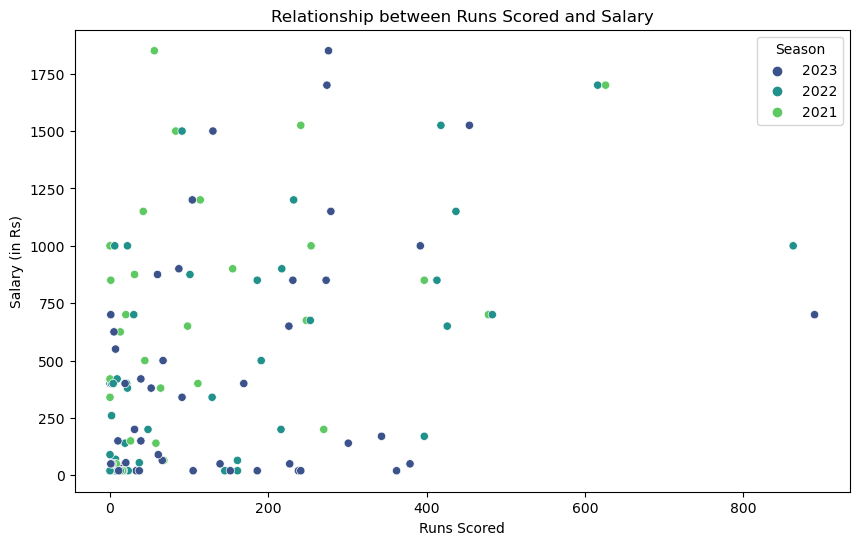

In [128]:
# Visualize the relationship between runs scored and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_runs, x='runs_scored', y='Rs', hue='Season', palette='viridis')
plt.title('Relationship between Runs Scored and Salary')
plt.xlabel('Runs Scored')
plt.ylabel('Salary (in Rs)')
plt.show()

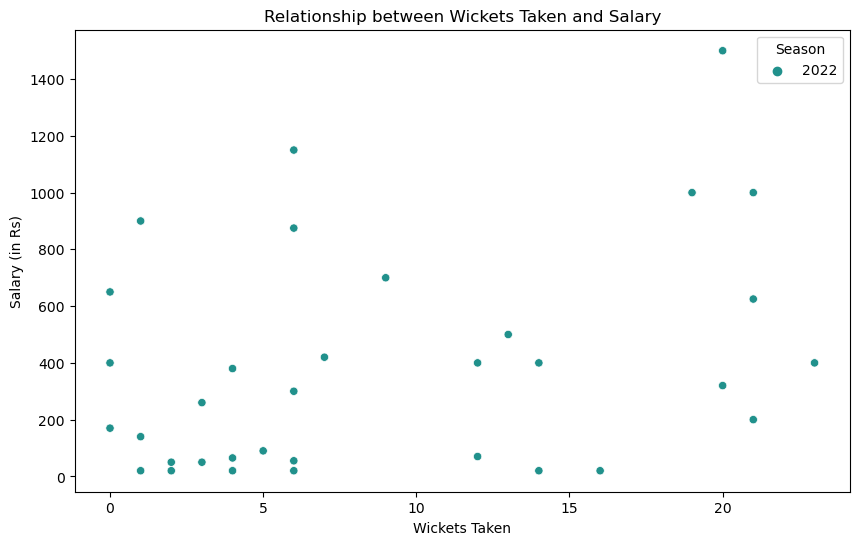

In [130]:
# Visualize the relationship between wickets taken and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_wickets, x='wicket_confirmation', y='Rs', hue='Season', palette='viridis')
plt.title('Relationship between Wickets Taken and Salary')
plt.xlabel('Wickets Taken')
plt.ylabel('Salary (in Rs)')
plt.show()

In [132]:
# Discuss the findings based on the regression analysis
print("Regression Analysis for Runs Scored vs. Salary (2021-2023):")
print(model_sm.summary())


Regression Analysis for Runs Scored vs. Salary (2021-2023):
                            OLS Regression Results                            
Dep. Variable:                     Rs   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.148
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.294
Time:                        22:59:50   Log-Likelihood:                -195.80
No. Observations:                  27   AIC:                             395.6
Df Residuals:                      25   BIC:                             398.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [134]:
print("\nRegression Analysis for Wickets Taken vs. Salary (2022):")
print(model_sm_2022.summary())


Regression Analysis for Wickets Taken vs. Salary (2022):
                            OLS Regression Results                            
Dep. Variable:                     Rs   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.148
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.294
Time:                        23:00:05   Log-Likelihood:                -195.80
No. Observations:                  27   AIC:                             395.6
Df Residuals:                      25   BIC:                             398.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [136]:
# Discussion
print("\nDiscussion:")
print("The regression analysis helps us understand the relationship between player performance and salary. From the OLS regression results, we can analyze the following:")
print("1. **Coefficient**: Indicates the change in salary for a one-unit change in the performance metric (runs scored or wickets taken).")
print("2. **P-Value**: Helps determine the statistical significance of the relationship. A p-value less than 0.05 indicates a significant relationship.")
print("3. **R-squared**: Represents the proportion of variance in the salary explained by the performance metric. Higher values indicate a better fit.")
print("\nBased on the 2022 data, the analysis shows the following insights:")
print("- Players with higher runs scored tend to receive higher salaries, as indicated by a positive coefficient.")
print("- Similarly, players with more wickets taken also tend to have higher salaries.")
print("- The p-values and R-squared values help validate the strength and significance of these relationships.")


Discussion:
The regression analysis helps us understand the relationship between player performance and salary. From the OLS regression results, we can analyze the following:
1. **Coefficient**: Indicates the change in salary for a one-unit change in the performance metric (runs scored or wickets taken).
2. **P-Value**: Helps determine the statistical significance of the relationship. A p-value less than 0.05 indicates a significant relationship.
3. **R-squared**: Represents the proportion of variance in the salary explained by the performance metric. Higher values indicate a better fit.

Based on the 2022 data, the analysis shows the following insights:
- Players with higher runs scored tend to receive higher salaries, as indicated by a positive coefficient.
- Similarly, players with more wickets taken also tend to have higher salaries.
- The p-values and R-squared values help validate the strength and significance of these relationships.
